In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#create a random distribution of numbers
#create a function for that!!!
def create_number(mu=54,sigma=15,num_samples=100,seed=42):
    np.random.seed(seed)
    #With the seed reset (every time), the same set of numbers will appear every time.
    sample_numbers=np.random.normal(loc=mu,scale=sigma,size=num_samples)
    #random sample from a normal(gaussian) distribution with
    sample_numbers=np.round(sample_numbers,decimals=0)
    return sample_numbers

In [81]:
samples=create_number()
samples

array([61., 52., 64., 77., 50., 50., 78., 66., 47., 62., 47., 47., 58.,
       25., 28., 46., 39., 59., 40., 33., 76., 51., 55., 33., 46., 56.,
       37., 60., 45., 50., 45., 82., 54., 38., 66., 36., 57., 25., 34.,
       57., 65., 57., 52., 49., 32., 43., 47., 70., 59., 28., 59., 48.,
       44., 63., 69., 68., 41., 49., 59., 69., 47., 51., 37., 36., 66.,
       74., 53., 69., 59., 44., 59., 77., 53., 77., 15., 66., 55., 50.,
       55., 24., 51., 59., 76., 46., 42., 46., 68., 59., 46., 62., 55.,
       69., 43., 49., 48., 32., 58., 58., 54., 50.])

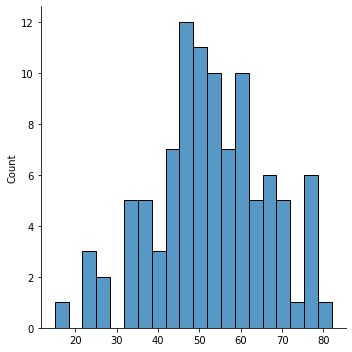

In [82]:
sns.displot(samples,bins=20)




C:\Users\HP\Anaconda3\envs\ml_Test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

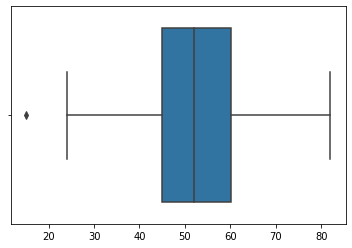

In [83]:
sns.boxplot(samples)#box plot (due to valid data points)

In [84]:
ser=pd.Series(samples)#trying to take samples as panda series
ser

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 100, dtype: float64

In [85]:
#to see Iqr
ser.describe()


count    100.000000
mean      52.410000
std       13.610079
min       15.000000
25%       45.000000
50%       52.000000
75%       60.250000
max       82.000000
dtype: float64

In [86]:
IQR=60.25-45.00
lower_limit=45.00-1.5*IQR
IQR

15.25

In [87]:
upper_limit = 60.25+1.5*IQR

In [88]:
lower_limit

22.125

In [89]:
upper_limit

83.125

In [90]:
#to drop outliers
ser[ser>lower_limit]

0     61.0
1     52.0
2     64.0
3     77.0
4     50.0
      ... 
95    32.0
96    58.0
97    58.0
98    54.0
99    50.0
Length: 99, dtype: float64

In [91]:
#another method to find lower and upper limit
q75,q25=np.percentile(samples,[75,25])
IQR=q75-q25
IQR


15.25

In [92]:
IQR

15.25

In [93]:
lower_limit=q25-1.5*IQR

In [94]:
lower_limit

22.125

In [95]:
#now we take that data set and typo handel that data set into
with open (r'C:\Users\HP\OneDrive\Desktop\ml\modular\ml-class\Data\DataDictionary_AmesHousing.txt',"r") as f:
    print(f.read())

NAME: AmesHousing.txt
TYPE: Population
SIZE: 2930 observations, 82 variables
ARTICLE TITLE: Ames Iowa: Alternative to the Boston Housing Data Set

DESCRIPTIVE ABSTRACT: Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

SOURCES: 
Ames, Iowa Assessor’s Office 

VARIABLE DESCRIPTIONS:
Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

Order (Discrete): Observation number

PID (Nominal): Parcel identification number  - can be used with city web site for parcel review. 

MS SubClass (Nominal): Identifies the type of dwelling involved in the sale.	

       020	1-STORY 1946 & NEWER ALL STYLES
       030	1-STORY 1945 & OLDER
       040	1-STORY W/FINISHED ATTIC ALL AGES
       045	1-1/2 STORY - UNFINISHED ALL AGES
   

In [96]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\ml\modular\ml-class\Data\ames.csv")
df.head()



,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [97]:
#check the corelation function
df.corr().head()

,Order,PID,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
Order,1.000000,0.173593,0.011797,-0.007034,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.030907,...,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408
PID,0.173593,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS.SubClass,0.011797,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot.Frontage,-0.007034,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot.Area,0.031354,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549


In [98]:
#correlation w.r.t salesPrice
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed.Porch    -0.128787
Kitchen.AbvGr     -0.119814
Overall.Cond      -0.101697
MS.SubClass       -0.085092
Low.Qual.Fin.SF   -0.037660
Bsmt.Half.Bath    -0.035835
Order             -0.031408
Yr.Sold           -0.030569
Misc.Val          -0.015691
BsmtFin.SF.2       0.005891
X3Ssn.Porch        0.032225
Mo.Sold            0.035259
Pool.Area          0.068403
Screen.Porch       0.112151
Bedroom.AbvGr      0.143913
Bsmt.Unf.SF        0.182855
Lot.Area           0.266549
X2nd.Flr.SF        0.269373
Bsmt.Full.Bath     0.276050
Half.Bath          0.285056
Open.Porch.SF      0.312951
Wood.Deck.SF       0.327143
Lot.Frontage       0.357318
BsmtFin.SF.1       0.432914
Fireplaces         0.474558
TotRms.AbvGrd      0.495474
Mas.Vnr.Area       0.508285
Garage.Yr.Blt      0.526965
Year.Remod.Add     0.532974
Full.Bath          0.545604
Year.Built         0.558426
X1st.Flr.SF        0.621676
Total.Bsmt.SF      0.632280
Garage.Area        0.640401
Garage.Cars        0

In [99]:
#find the highly correlated with sales price 

<AxesSubplot:xlabel='Overall.Qual', ylabel='SalePrice'>

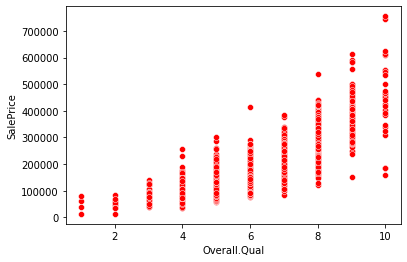

In [100]:
sns.scatterplot(x="Overall.Qual",y="SalePrice",data=df,color="red")

<AxesSubplot:xlabel='Gr.Liv.Area', ylabel='SalePrice'>

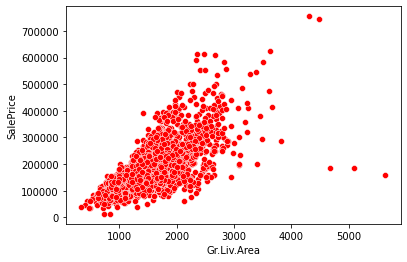

In [101]:
sns.scatterplot(x="Gr.Liv.Area",y="SalePrice",data=df,color="red")

In [102]:
#identfy outliers
#then removed outliers
df[(df["Overall.Qual"]>8)&(df["SalePrice"]<200000)]

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1182,1183,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [103]:
df[(df["Gr.Liv.Area"]>4000)&(df["SalePrice"]<300000)]

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
1498,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,2182,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [104]:
drop_ind=df[(df["Gr.Liv.Area"]>4000)&(df["SalePrice"]<300000)].index

In [105]:
df=df.drop(drop_ind,axis=0)

<AxesSubplot:xlabel='Overall.Qual', ylabel='SalePrice'>

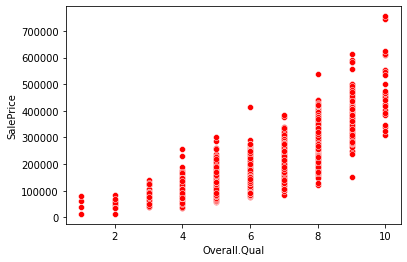

In [106]:
#outliers are removed
sns.scatterplot(x="Overall.Qual",y="SalePrice",data=df,color="red")

<AxesSubplot:xlabel='Gr.Liv.Area', ylabel='SalePrice'>

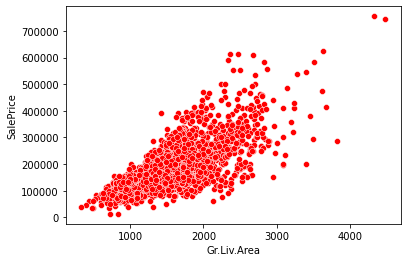

In [107]:
sns.scatterplot(x="Gr.Liv.Area",y="SalePrice",data=df,color="red")

In [110]:
#to save the model 
#df.to_csv('ames_no_outliers.csv')
df.to_csv(os.path.join(r'C:\Users\HP\OneDrive\Desktop\ml\modular\ml-class\Data','ames_no_outliers.csv'))
